<a href="https://colab.research.google.com/github/agupta7654/ml-colab/blob/main/Arnav_Gupta_Birds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bird Call Identification

In [ ]:
# imports
import os

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd
import tensorflow as tf

In [ ]:
cmd = "curl -L -o ./bird-song-data-set.zip https://www.kaggle.com/api/v1/datasets/download/vinayshanbhag/bird-song-data-set && unzip bird-song-data-set.zip"

In [ ]:
os.system(cmd)

256

In [ ]:
df = pd.read_csv("bird_songs_metadata.csv")

In [ ]:
df

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-8.wav
5418,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-10.wav
5419,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-14.wav
5420,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-15.wav


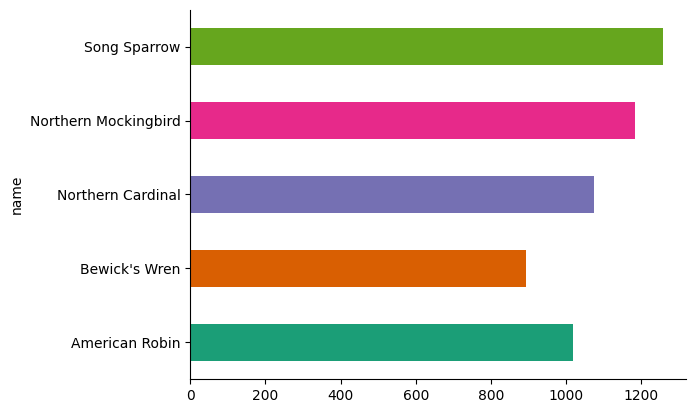

In [ ]:
# @title Category Distribution

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title File Sizes

import os
import random

wav_files_dir = 'wavfiles'
wav_files = [f for f in os.listdir(wav_files_dir) if f.endswith('.wav')]

# Select 10 random .wav files
random_wav_files = random.sample(wav_files, min(10, len(wav_files)))

for filename in random_wav_files:
    filepath = os.path.join(wav_files_dir, filename)
    try:
        file_size = os.path.getsize(filepath)
        print(f"File: {filename}, Size: {file_size} bytes")
    except OSError as e:
        print(f"Error getting size of {filename}: {e}")


File: 190456-3.wav, Size: 264658 bytes
File: 324081-13.wav, Size: 264658 bytes
File: 321914-12.wav, Size: 264658 bytes
File: 35907-4.wav, Size: 264658 bytes
File: 138494-11.wav, Size: 264658 bytes
File: 129646-0.wav, Size: 264658 bytes
File: 146160-2.wav, Size: 264658 bytes
File: 109668-9.wav, Size: 264658 bytes
File: 190473-9.wav, Size: 264658 bytes
File: 382878-1.wav, Size: 264658 bytes


In [ ]:
# @title Load audio data and labels
import os
import pandas as pd
import librosa
import numpy as np

# Assuming 'df' and 'wav_files_dir' are defined from the previous code
# ... (previous code to load the dataframe and directory)

dataset = []
for index, row in df.iterrows():
    wav_file = os.path.join(wav_files_dir, row['filename'])
    if os.path.exists(wav_file):
        try:
            y, sr = librosa.load(wav_file, sr=None) #Load with original sample rate
            dataset.append({'X': y, 'Y': row['name']})
        except Exception as e:
            print(f"Error processing {wav_file}: {e}")
    else:
        print(f"File not found: {wav_file}")

# Convert to numpy arrays for easier use
X = np.array([item['X'] for item in dataset])
Y = np.array([item['Y'] for item in dataset])

# Now you have X (audio data) and Y (bird names) in numpy arrays.
# You can further process and split these arrays for machine learning tasks.
print(X.shape,Y.shape)


(5422, 66150) (5422,)


In [ ]:
# @title save this X,Y to a file
np.save('X.npy', X)
np.save('Y.npy', Y)

In [ ]:
# @title load the file
X = np.load('X.npy')
Y = np.load('Y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming X and Y are already loaded from the previous code
# ... (previous code to load X and Y)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Encode the target variable (Y) using Label Encoding and One-Hot Encoding
label_encoder = LabelEncoder()
integer_encoded_Y_train = label_encoder.fit_transform(Y_train)
integer_encoded_Y_test = label_encoder.transform(Y_test)

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense array
onehot_encoded_Y_train = onehot_encoder.fit_transform(integer_encoded_Y_train.reshape(-1, 1))
onehot_encoded_Y_test = onehot_encoder.transform(integer_encoded_Y_test.reshape(-1, 1))

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape (one-hot encoded):", onehot_encoded_Y_train.shape)
print("Y_test shape (one-hot encoded):", onehot_encoded_Y_test.shape)


X_train shape: (4337, 66150)
X_test shape: (1085, 66150)
Y_train shape (one-hot encoded): (4337, 5)
Y_test shape (one-hot encoded): (1085, 5)


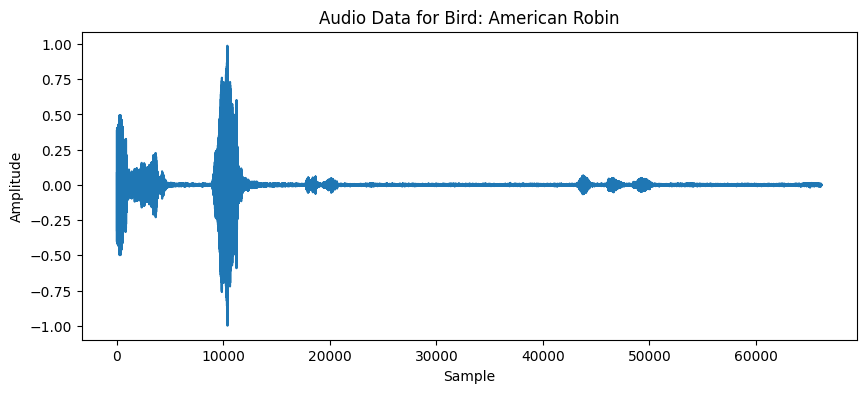

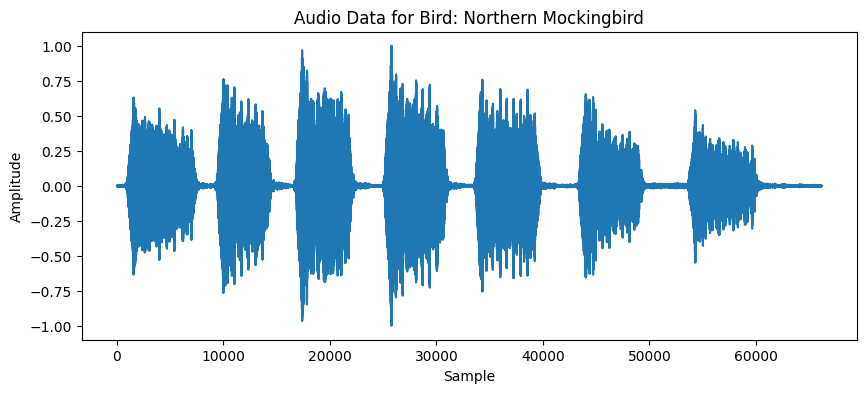

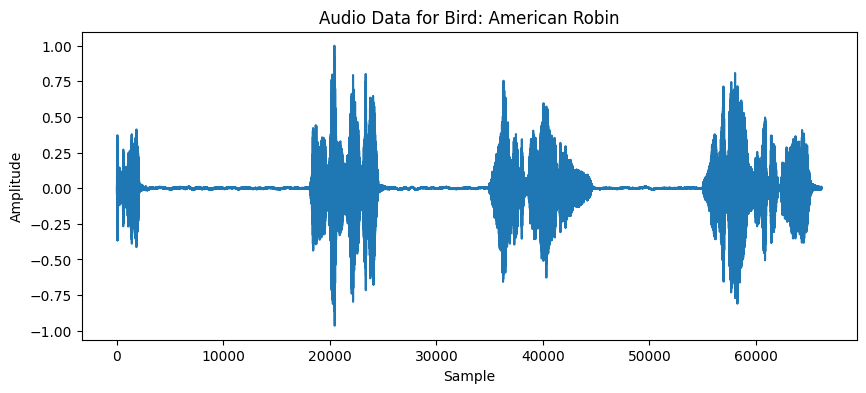

In [ ]:
import matplotlib.pyplot as plt
import random

# Assuming X and Y are already loaded from the previous code
# ... (previous code to load X and Y)

# Select 3 random indices
random_indices = random.sample(range(len(X)), 3)

for i in random_indices:
    plt.figure(figsize=(10, 4))  # Adjust figure size as needed
    plt.plot(X[i])
    plt.title(f"Audio Data for Bird: {Y[i]}") #added a title
    plt.xlabel("Sample") #added x axis label
    plt.ylabel("Amplitude") #added y axis label
    plt.show()


In [ ]:
# prompt: ok now let's turn each bird call into MFCC data

import librosa

# Assuming X_train, X_test are already defined and loaded from previous code
# ... (previous code to load X_train and X_test)

def extract_mfccs(audio_data, n_mfcc=26, n_fft=2048, hop_length=512):
    """Extracts MFCCs from audio data."""
    mfccs = librosa.feature.mfcc(y=audio_data, sr=22050, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    # scale, adding vertical pixels to make a square image
    mfccs = tf.image.resize(np.expand_dims(mfccs, axis=-1), [130, 130])
    mfccs = tf.squeeze(mfccs)
    mfccs = mfccs.numpy()

    return mfccs

# Example usage:
X_train_mfccs = [extract_mfccs(x) for x in X_train]
X_test_mfccs = [extract_mfccs(x) for x in X_test]



In [ ]:
X_test_mfccs[0].shape

(130, 130)

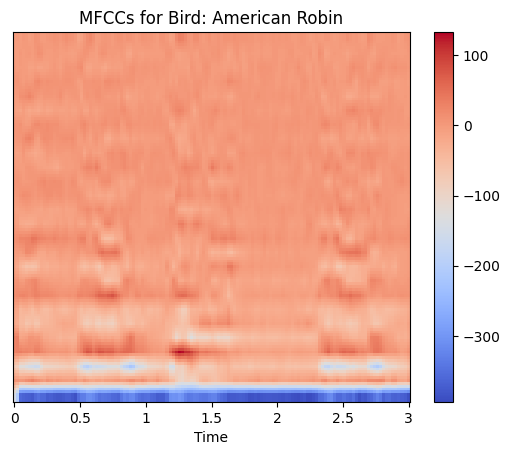

In [ ]:
librosa.display.specshow(X_train_mfccs[0], sr=22050, x_axis='time')
plt.colorbar()
plt.title('MFCCs for Bird: {}'.format(Y_train[0]))
plt.show()

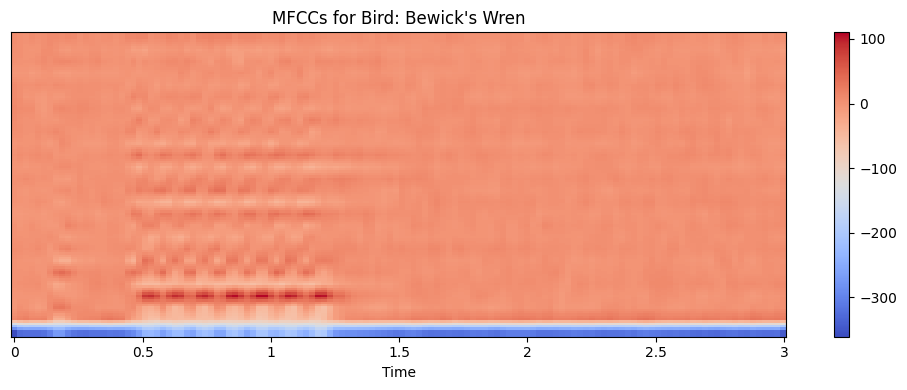

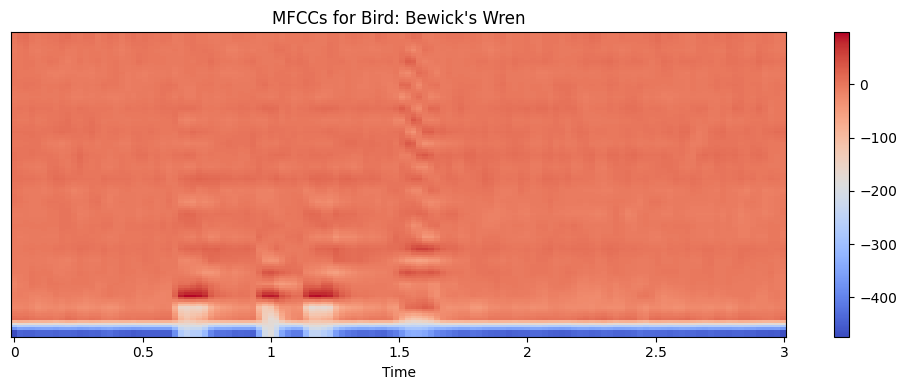

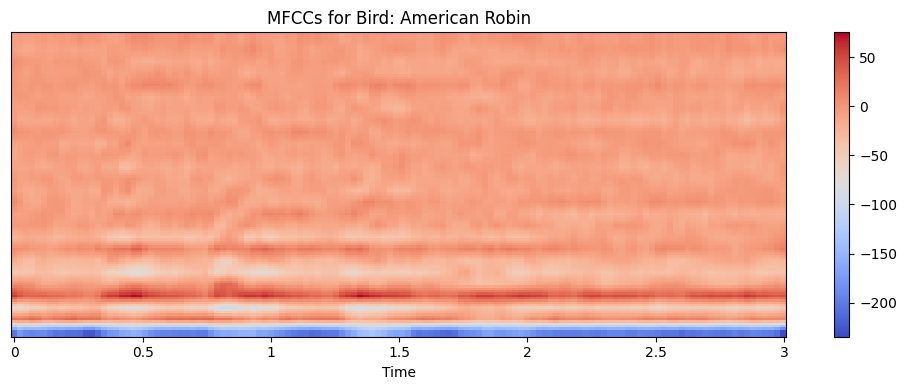

In [ ]:
# prompt: plot 3 random MFCCs from X_train_mfccs and label with their Y value. Mkae a 2D heat map plot using all 13 MFCCs on the Y axis

import matplotlib.pyplot as plt
import librosa.display
import random

# Select 3 random indices
random_indices = random.sample(range(len(X_train_mfccs)), 3)

for i in random_indices:
    # Plot MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(X_train_mfccs[i], sr=22050, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCCs for Bird: {Y_train[i]}")
    plt.tight_layout()
    plt.show()


In [ ]:
mfcc = X_train_mfccs[0]

In [ ]:
mfcc.shape

(130, 130)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Assuming X_train_mfccs and onehot_encoded_Y_train are defined from the previous code
# ... (previous code to load X_train_mfccs and onehot_encoded_Y_train)

X_train_mfccs = np.array(X_train_mfccs)
onehot_encoded_Y_train = np.array(onehot_encoded_Y_train)

# Split the training data into training and validation sets
X_train_final, X_val, Y_train_final, Y_val = train_test_split(
    X_train_mfccs, onehot_encoded_Y_train, test_size=0.2, random_state=42)


# Reshape data for CNN input (assuming the shape is (number of samples, 130, 130, 1))
X_train_final = X_train_final.reshape(-1, 130, 130, 1)
X_val = X_val.reshape(-1, 130, 130, 1)


# Define the CNN model
model = Sequential([
    Conv2D(64, (5, 3), activation='relu', input_shape=(130, 130, 1), padding='same'),
    Conv2D(64, (7, 7), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (5, 5), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(onehot_encoded_Y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model with validation data and early stopping
history = model.fit(X_train_final, Y_train_final, epochs=50, batch_size=32,
                    validation_data=(X_val, Y_val), callbacks=[early_stopping])


# Evaluate the model
loss, accuracy = model.evaluate(X_val, Y_val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
108/109 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4149 - loss: 1.5879

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import librosa
import numpy as np
import random
from scipy import signal  # Import scipy.signal

def augment_audio(audio_data, sr):
    """
    Augments audio data by adjusting pitch, applying low-pass and high-pass filters randomly.
    """
    augmented_data = audio_data.copy()

    # Pitch shift
    pitch_shift_factor = random.uniform(-0.2, 0.2)  # +/- 20% pitch shift
    augmented_data = librosa.effects.pitch_shift(augmented_data, sr=sr, n_steps=pitch_shift_factor)

    # Randomly apply low-pass or high-pass filters
    if random.random() < 0.5:  # Apply with 50% probability
        cutoff_freq_low = random.uniform(5000, 10000) #random cutoff frequency
        augmented_data = apply_lowpass_filter(augmented_data, sr, cutoff_freq_low)

    if random.random() < 0.5:  # Apply with 50% probability
        cutoff_freq_high = random.uniform(500, 1000) #random cutoff frequency
        augmented_data = apply_highpass_filter(augmented_data, sr, cutoff_freq_high)

    return augmented_data

def apply_lowpass_filter(audio, sr, cutoff_freq):
    nyquist_freq = 0.5 * sr
    normalized_cutoff = cutoff_freq / nyquist_freq
    # Use scipy.signal.butter instead
    b, a = signal.butter(4, normalized_cutoff, btype='lowpass')
    filtered_audio = signal.filtfilt(b, a, audio)  # Use signal.filtfilt
    return filtered_audio

def apply_highpass_filter(audio, sr, cutoff_freq):
    nyquist_freq = 0.5 * sr
    normalized_cutoff = cutoff_freq / nyquist_freq
    # Use scipy.signal.butter instead
    b, a = signal.butter(4, normalized_cutoff, btype='highpass')
    filtered_audio = signal.filtfilt(b, a, audio)  # Use signal.filtfilt
    return filtered_audio

# Example usage (assuming you have 'dataset' from your previous code)

augmented_dataset = []
for item in dataset[1:500]:
    augmented_audio_data = augment_audio(item['X'], 22050)  # Assuming a sample rate of 22050
    augmented_dataset.append({'X': augmented_audio_data, 'Y': item['Y']})

# Convert the augmented dataset to NumPy arrays
augmented_X = np.array([item['X'] for item in augmented_dataset])
augmented_Y = np.array([item['Y'] for item in augmented_dataset])

# Now you can use 'augmented_X' and 'augmented_Y' for training your model
print("Augmented data shapes:", augmented_X.shape, augmented_Y.shape)

In [ ]:
# prompt: add the augmented data to the original X_train

# Combine original and augmented data
X_train_combined = np.concatenate((X_train, augmented_X), axis=0)
Y_train_combined = np.concatenate((Y_train, augmented_Y), axis=0)

print("Combined training data shapes:", X_train_combined.shape, Y_train_combined.shape)


In [ ]:
# prompt: now let's run the same MFCC filtering, rescaling and training from above, on this new augmented data set

# Assuming X_train_combined and Y_train_combined are defined from the previous code
# ... (previous code to create X_train_combined and Y_train_combined)

# Encode the combined target variable
label_encoder_combined = LabelEncoder()
integer_encoded_Y_train_combined = label_encoder_combined.fit_transform(Y_train_combined)

onehot_encoder_combined = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_encoded_Y_train_combined = onehot_encoder_combined.fit_transform(integer_encoded_Y_train_combined.reshape(-1, 1))

# Extract MFCCs from the combined training data
X_train_mfccs_combined = [extract_mfccs(x) for x in X_train_combined]
X_test_mfccs_combined = [extract_mfccs(x) for x in X_test]


X_train_mfccs_combined = np.array(X_train_mfccs_combined)
X_test_mfccs_combined = np.array(X_test_mfccs_combined)
onehot_encoded_Y_train_combined = np.array(onehot_encoded_Y_train_combined)
onehot_encoded_Y_test = np.array(onehot_encoded_Y_test)


# Reshape data for CNN input
X_train_mfccs_combined = X_train_mfccs_combined.reshape(-1, 130, 130, 1)
X_test_mfccs_combined = X_test_mfccs_combined.reshape(-1, 130, 130, 1)

# Split the combined training data into training and validation sets
X_train_final_combined, X_val_combined, Y_train_final_combined, Y_val_combined = train_test_split(
    X_train_mfccs_combined, onehot_encoded_Y_train_combined, test_size=0.2, random_state=42)

# Define and compile the model (same as before)
model_combined = model

model_combined.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the combined data
history_combined = model_combined.fit(X_train_final_combined, Y_train_final_combined, epochs=50, batch_size=32,
                    validation_data=(X_val_combined, Y_val_combined), callbacks=[early_stopping])

# Evaluate the model on the test set
loss_combined, accuracy_combined = model_combined.evaluate(X_test_mfccs_combined, onehot_encoded_Y_test, verbose=0)
print("Test Loss:", loss_combined)
print("Test Accuracy:", accuracy_combined)


In [ ]:
# prompt: make a confusion chart heat map for the birds in the test set, using the best model in the previous cell

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming model_combined and X_test_mfccs_combined are defined
# ... (previous code to define and train model_combined)

# Predict the classes for the test set
Y_pred_prob = model_combined.predict(X_test_mfccs_combined)
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Get the true classes for the test set
Y_true = np.argmax(onehot_encoded_Y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Bird Species Classification')
plt.show()
